<a href="https://colab.research.google.com/github/Veronicapolaya/Portafolio-prompts/blob/main/Telecom_x_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Extracción**

En esta etapa se realizó la extracción de los datos desde la API de Telecom X en formato JSON. Los datos fueron cargados utilizando Python y convertidos en un DataFrame de Pandas, permitiendo su posterior procesamiento y análisis.

In [2]:
import pandas as pd
import requests

In [3]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# **🔧 Transformación**


### **Conoce el conjunto de datos**

En esta etapa se realizó una exploración inicial del conjunto de datos con el objetivo de comprender su estructura, los tipos de variables disponibles y su relevancia para el análisis de evasión de clientes.

Se analizaron las columnas, tipos de datos y valores únicos de las principales variables, incluyendo la variable objetivo Churn, con el fin de identificar posibles inconsistencias en categorías y formatos. Asimismo, se evaluó la integridad de los identificadores de clientes y la estructura anidada de los datos, lo que permitirá orientar correctamente las siguientes etapas de transformación y análisis exploratorio.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [6]:
df.columns


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

### **Comprobación de incoherencias en los datos**

**1. Valores ausentes**

In [7]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


**2. Registros duplicados**

Al verificar la existencia de registros duplicados, se identificó que el uso de duplicated() sobre el DataFrame completo genera un error debido a la presencia de columnas con estructuras anidadas (diccionarios). Por ello, la verificación se realizó utilizando la columna customerID, garantizando la unicidad de los clientes dentro del conjunto de datos.

In [16]:
df['customerID'].duplicated().sum()


np.int64(0)

**3. Inconsistencias en categorías**

In [11]:
df['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [12]:
df['customer'].apply(lambda x: x['gender']).unique()


array(['Female', 'Male'], dtype=object)

In [13]:
df['account'].apply(lambda x: x['Contract']).unique()


array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [14]:
df['internet'].apply(lambda x: x['InternetService']).unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

**4. Errores de formato (fechas / números)**

In [15]:
df['account'].apply(lambda x: x['Charges']['Total']).head()


,account
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4


### **Manejo de inconsistencias en los datos**

En esta etapa se realizó el manejo de inconsistencias del conjunto de datos, transformando las estructuras anidadas en columnas planas y corrigiendo los formatos de las variables numéricas y categóricas.

Se normalizaron los valores de texto para evitar inconsistencias en las categorías y se ajustaron los tipos de datos de las variables numéricas, garantizando que el dataset quede preparado para el análisis exploratorio y la generación de insights.

**1. Aplanar columnas con datos anidados (ETL)**

In [19]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


In [20]:
df_clean = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)


**2. Corrección de tipos de datos (números)**

In [21]:
df_clean['Charges.Monthly'] = pd.to_numeric(df_clean['Charges.Monthly'], errors='coerce')
df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'], errors='coerce')


In [22]:
df_clean[['Charges.Monthly', 'Charges.Total']].isnull().sum()


,0
Charges.Monthly,0
Charges.Total,11


**3. Normalización de variables categóricas (strings)**

In [23]:
df_clean['Churn'] = df_clean['Churn'].str.lower()
df_clean['gender'] = df_clean['gender'].str.lower()
df_clean['Contract'] = df_clean['Contract'].str.lower()
df_clean['InternetService'] = df_clean['InternetService'].str.lower()


In [24]:
df_clean['InternetService'] = df_clean['InternetService'].replace('no', 'no_internet')


In [25]:
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,no,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,Mailed check,83.9,267.40


## **Cuentas_Diarias**

Como parte del enriquecimiento del conjunto de datos, se creó la columna Cuentas_Diarias, calculada a partir de la facturación mensual (Charges.Monthly) dividida entre 30 días.

Esta variable permite analizar el comportamiento de gasto diario de los clientes y proporciona una perspectiva más detallada para el análisis exploratorio y la identificación de patrones relacionados con la evasión de clientes.

In [26]:
df_clean['Charges.Monthly'].dtype


dtype('float64')

In [27]:
df_clean['Cuentas_Diarias'] = df_clean['Charges.Monthly'] / 30


In [28]:
df_clean[['Charges.Monthly', 'Cuentas_Diarias']].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [30]:
df_clean['Cuentas_Diarias'] = df_clean['Cuentas_Diarias'].round(2)


## **standarización y transformación de datos**

De manera opcional, se realizó una estandarización y transformación adicional de los datos con el objetivo de mejorar su consistencia y facilitar el análisis. Las variables binarias fueron convertidas de valores textuales a valores numéricos (1 y 0), permitiendo una interpretación más clara y un procesamiento matemático más eficiente.

Asimismo, se normalizaron las variables categóricas y se renombraron algunas columnas para mejorar la legibilidad del conjunto de datos, facilitando tanto el análisis exploratorio como la comunicación de resultados con audiencias no técnicas.

In [31]:
binary_cols = [
    'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]


In [32]:
for col in binary_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.lower()
        .replace({'yes': 1, 'no': 0})
    )


/tmp/ipython-input-1005365650.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0})
/tmp/ipython-input-1005365650.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0})
/tmp/ipython-input-1005365650.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [33]:
categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

for col in categorical_cols:
    df_clean[col] = df_clean[col].str.lower().str.replace(' ', '_')


In [34]:
df_clean = df_clean.rename(columns={
    'Charges.Monthly': 'charges_monthly',
    'Charges.Total': 'charges_total',
    'Cuentas_Diarias': 'daily_charges'
})


In [35]:
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,charges_monthly,charges_total,daily_charges
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one_year,1,mailed_check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.80


# **📊 Carga y análisis**

A partir del análisis descriptivo, se observa que la antigüedad promedio de los clientes es de aproximadamente 32 meses. Sin embargo, al segmentar por la variable Churn, se identifican diferencias relevantes: los clientes que se dan de baja presentan una antigüedad significativamente menor en comparación con aquellos que permanecen en la empresa.

Asimismo, los clientes con churn muestran un mayor gasto mensual y diario promedio, lo que sugiere que los costos del servicio podrían estar relacionados con la evasión. Estas diferencias iniciales indican que tanto la antigüedad como el nivel de facturación son variables clave para comprender el comportamiento de abandono de clientes.

### **Análisis descriptivo general**

In [36]:
df_clean.describe()


,Partner,Dependents,tenure,PhoneService,PaperlessBilling,charges_monthly,charges_total,daily_charges
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.157292
std,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,1.180000
50%,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [37]:
df_clean[['tenure', 'charges_monthly', 'charges_total', 'daily_charges']].describe()


,tenure,charges_monthly,charges_total,daily_charges
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157292
std,24.571773,30.129572,2268.632997,1.004407
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.425000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.875000,3785.300000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


In [38]:
df_clean.groupby('Churn')[['tenure', 'charges_monthly', 'daily_charges']].describe()


tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0   

      charges_monthly             ...                  daily_charges  \
                count       mean  ...      75%     max         count   
Churn                             ...                                  
0              5174.0  61.265124  ...  88.4000  118.75        5174.0   
1              1869.0  74.441332  ...  94.2000  118.35        1869.0   
                224.0  63.412277  ...  90.4125  115.55         224.0   

                                                             
           mean       std   min    25%    50%     75%   max  
Churn                                                        
0      2.042080  1.036492  0.61  0.840  2.150  2.9500  3.96  
1      2.481450  0.822287  0.63  1.870  2.660  3.1400  3.94  
       2.113795  1.046431  0.62  0.945  2.305  3.0125  3.85  

[3 rows x 24 columns]

### **Distribución de evasión (Churn)**

El análisis de la distribución de la variable Churn muestra que la mayoría de los clientes permanece en la empresa, mientras que una proporción significativa se da de baja. Aproximadamente una cuarta parte de los clientes presenta evasión, lo que indica que el churn representa un problema relevante para Telecom X.

Esta distribución confirma la necesidad de profundizar en los factores asociados a la evasión, analizando variables como la antigüedad, el tipo de contrato y los cargos del servicio.

In [39]:
df_clean['Churn'].value_counts()


,count
Churn,
0,5174
1,1869
,224


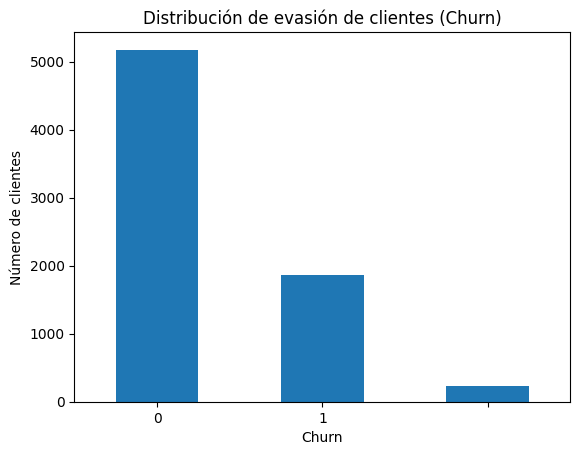

In [40]:
import matplotlib.pyplot as plt

churn_counts = df_clean['Churn'].value_counts()

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribución de evasión de clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()


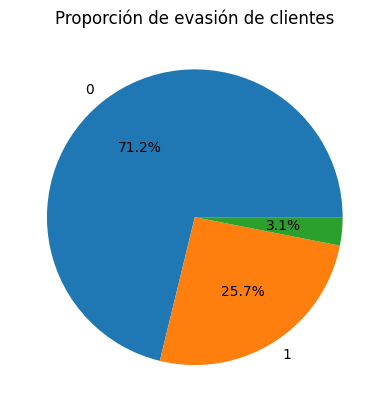

In [41]:
plt.figure()
churn_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de evasión de clientes')
plt.ylabel('')
plt.show()


### **Recuento de evasión por variables categóricas**

El análisis del churn por variables categóricas permitió identificar patrones relevantes en el comportamiento de los clientes. Se observa que los clientes con contratos de tipo mensual presentan una mayor tasa de evasión en comparación con aquellos con contratos de mayor duración.

Asimismo, ciertos métodos de pago y tipos de servicio de internet muestran una mayor concentración de clientes que se dan de baja, mientras que variables como el género no evidencian diferencias significativas. Estos resultados sugieren que las condiciones contractuales y el tipo de servicio son factores clave en la evasión de clientes.

In [42]:
df_clean.groupby('Contract')['Churn'].value_counts()


Contract        Churn
month-to-month  0        2220
                1        1655
                          130
one_year        0        1307
                1         166
                           46
two_year        0        1647
                1          48
                           48
Name: count, dtype: int64

In [43]:
pd.crosstab(df_clean['Contract'], df_clean['Churn'])


Churn,0,1,
Contract,,,
month-to-month,2220,1655,130
one_year,1307,166,46
two_year,1647,48,48


In [44]:
import matplotlib.pyplot as plt

def plot_churn_by_category(column):
    churn_counts = pd.crosstab(df_clean[column], df_clean['Churn'])
    churn_counts.plot(kind='bar')
    plt.title(f'Evasión de clientes por {column}')
    plt.xlabel(column)
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=45)
    plt.show()


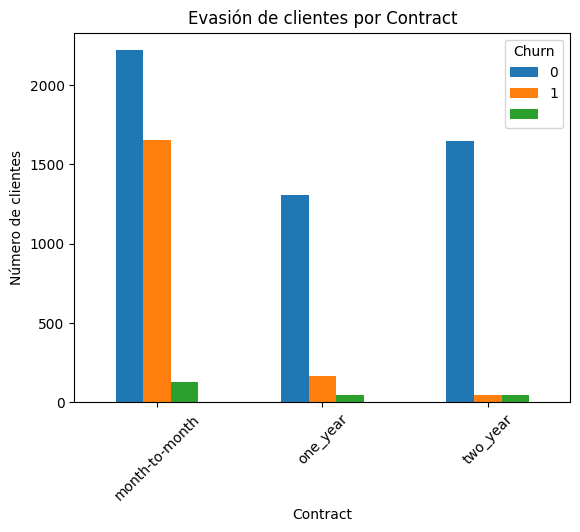

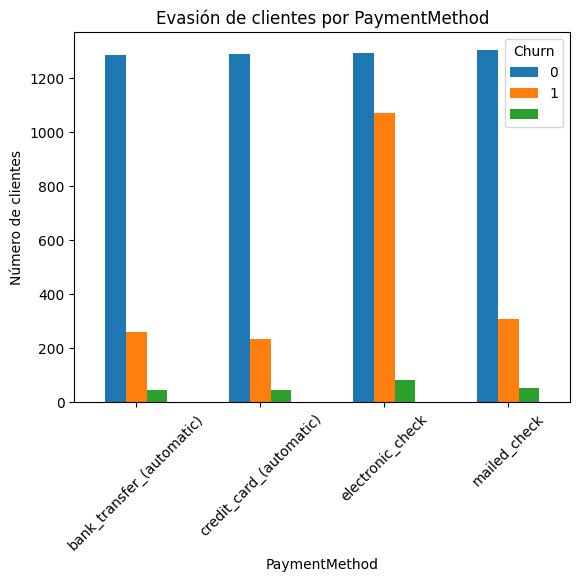

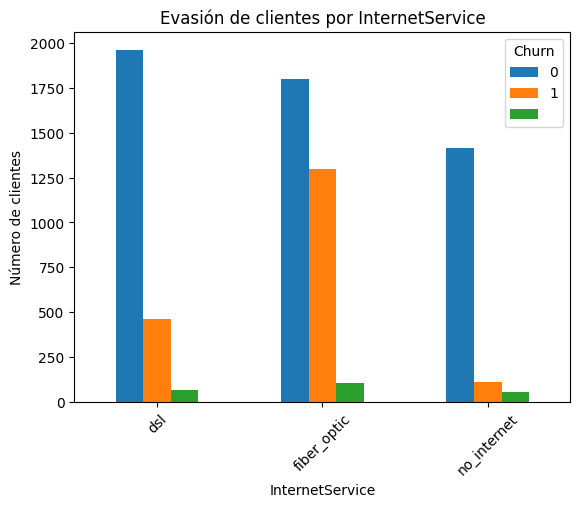

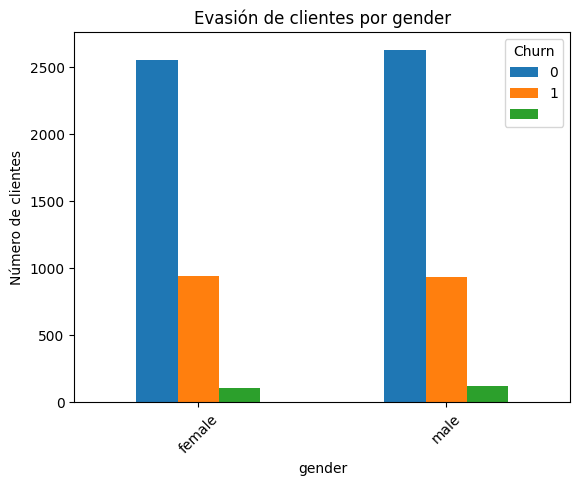

In [45]:
plot_churn_by_category('Contract')
plot_churn_by_category('PaymentMethod')
plot_churn_by_category('InternetService')
plot_churn_by_category('gender')


### **Conteo / análisis de evasión por variables numéricas**

El análisis de las variables numéricas muestra diferencias claras entre los clientes que se dan de baja y aquellos que permanecen en la empresa. Se observa que la evasión se concentra principalmente en clientes con menor tiempo de contrato, lo que indica una mayor vulnerabilidad durante los primeros meses de relación con la empresa.

Asimismo, los clientes que cancelan el servicio presentan, en promedio, cargos mensuales y diarios más elevados, lo que sugiere que el nivel de facturación es un factor asociado a la evasión. Estos resultados refuerzan la importancia de considerar tanto la antigüedad como el costo del servicio en las estrategias de retención.

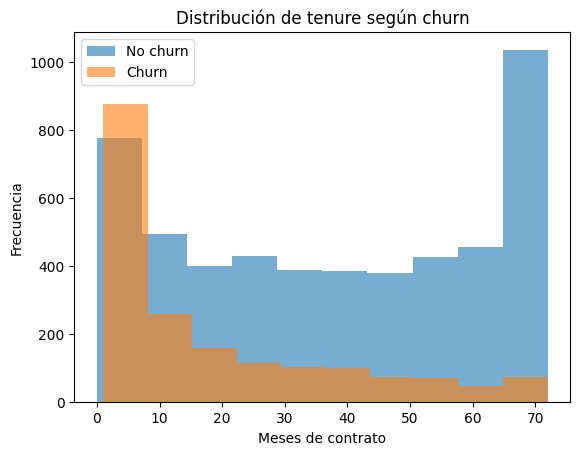

In [53]:
import matplotlib.pyplot as plt

plt.figure()
df_clean[df_clean['Churn'] == 0]['tenure'].plot(kind='hist', alpha=0.6, label='No churn')
df_clean[df_clean['Churn'] == 1]['tenure'].plot(kind='hist', alpha=0.6, label='Churn')
plt.title('Distribución de tenure según churn')
plt.xlabel('Meses de contrato')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


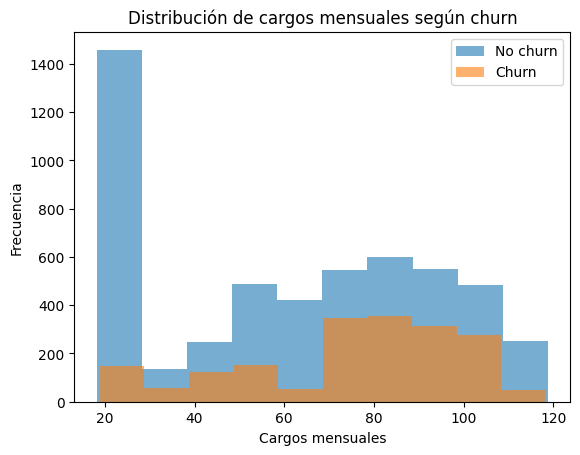

In [54]:
plt.figure()
df_clean[df_clean['Churn'] == 0]['charges_monthly'].plot(kind='hist', alpha=0.6, label='No churn')
df_clean[df_clean['Churn'] == 1]['charges_monthly'].plot(kind='hist', alpha=0.6, label='Churn')
plt.title('Distribución de cargos mensuales según churn')
plt.xlabel('Cargos mensuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


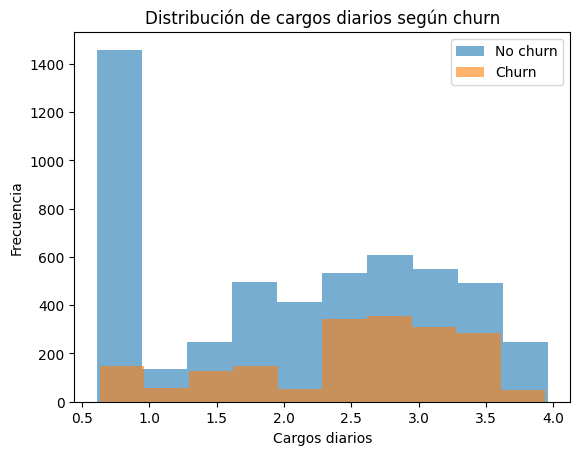

In [55]:
plt.figure()
df_clean[df_clean['Churn'] == 0]['daily_charges'].plot(kind='hist', alpha=0.6, label='No churn')
df_clean[df_clean['Churn'] == 1]['daily_charges'].plot(kind='hist', alpha=0.6, label='Churn')
plt.title('Distribución de cargos diarios según churn')
plt.xlabel('Cargos diarios')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

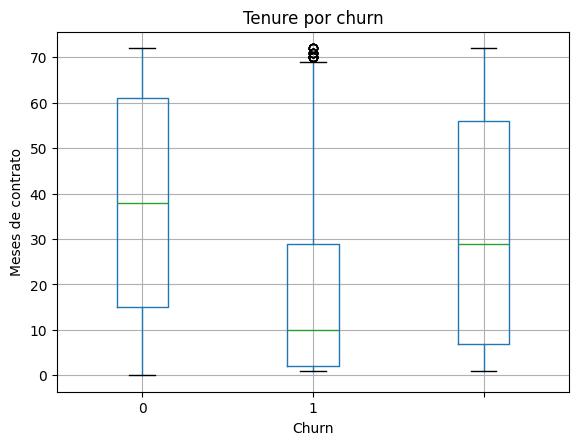

In [56]:
plt.figure()
df_clean.boxplot(column='tenure', by='Churn')
plt.title('Tenure por churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Meses de contrato')
plt.show()


<Figure size 640x480 with 0 Axes>

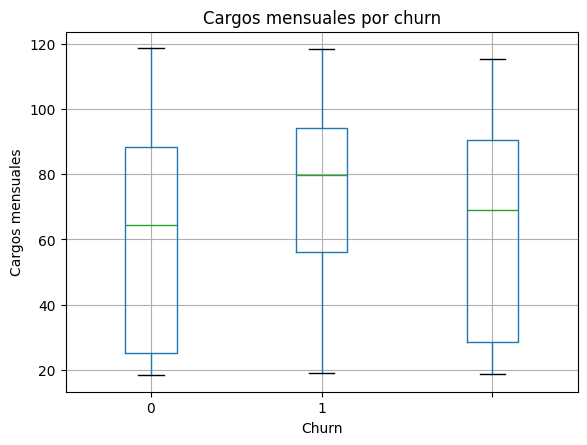

In [57]:
plt.figure()
df_clean.boxplot(column='charges_monthly', by='Churn')
plt.title('Cargos mensuales por churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()


### **Análisis de correlación entre variables**

In [65]:
corr_df_clean.dtypes


,0
Churn,object
tenure,int64
charges_monthly,float64
daily_charges,float64
charges_total,float64
PaperlessBilling,int64
SeniorCitizen,object


In [66]:
corr_df_clean.select_dtypes(include='object').columns


Index(['Churn', 'SeniorCitizen'], dtype='object')

In [67]:
corr_df_fix = corr_df_clean.replace(r'^\s*$', pd.NA, regex=True).copy()

for col in corr_df_fix.columns:
    corr_df_fix[col] = pd.to_numeric(corr_df_fix[col], errors='coerce')


In [68]:
corr_matrix = corr_df_fix.dropna().corr()
corr_matrix


,Churn,tenure,charges_monthly,daily_charges,charges_total,PaperlessBilling,SeniorCitizen
Churn,1.000000,-0.354049,0.192858,0.192914,-0.199484,0.191454,0.150541
tenure,-0.354049,1.000000,0.246862,0.246874,0.825880,0.004823,0.015683
charges_monthly,0.192858,0.246862,1.000000,0.999996,0.651065,0.351930,0.219874
daily_charges,0.192914,0.246874,0.999996,1.000000,0.651080,0.351917,0.219848
charges_total,-0.199484,0.825880,0.651065,0.651080,1.000000,0.157830,0.102411
PaperlessBilling,0.191454,0.004823,0.351930,0.351917,0.157830,1.000000,0.156258
SeniorCitizen,0.150541,0.015683,0.219874,0.219848,0.102411,0.156258,1.000000


In [69]:
corr_matrix['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
daily_charges,0.192914
charges_monthly,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
charges_total,-0.199484
tenure,-0.354049


# **📄Informe final**

### **1. Introducción**

El objetivo de este proyecto es analizar el problema de evasión de clientes (Churn) en Telecom X, una empresa del sector de telecomunicaciones que enfrenta una tasa significativa de cancelaciones de servicio.
A través del análisis de datos históricos de clientes, se busca identificar patrones y factores asociados al churn, con el fin de proporcionar información relevante que permita al equipo de Data Science y a las áreas de negocio desarrollar estrategias orientadas a la retención de clientes y la reducción de la evasión.


### **2. Limpieza y Tratamiento de Datos**

Los datos fueron extraídos desde una API en formato JSON y cargados en un DataFrame de Pandas. Durante esta etapa se realizaron los siguientes procesos:

•	Importación de datos utilizando Python y la librería requests.

•	Conversión de los datos a un DataFrame para facilitar su análisis.

•	Exploración inicial de la estructura del dataset, identificando columnas, tipos de datos y posibles inconsistencias.

•	Verificación de valores ausentes, confirmando que no existían datos nulos relevantes.

•	Revisión de registros duplicados utilizando el identificador único customerID, asegurando la unicidad de los clientes.

•	Transformación de estructuras anidadas (diccionarios) en columnas planas mediante técnicas de ETL.

•	Corrección de tipos de datos, especialmente en variables numéricas relacionadas con los cargos.

•	Normalización y estandarización de variables categóricas y binarias.

•	Creación de una variable adicional (daily_charges) para analizar el gasto diario de los clientes.

•	Estas acciones permitieron obtener un conjunto de datos limpio, consistente y preparado para el análisis exploratorio.


### **3. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio permitió comprender mejor el comportamiento de los clientes y su relación con la evasión:

**Análisis descriptivo**

Se analizaron métricas como media, mediana y desviación estándar para variables clave como:

•	Antigüedad del cliente (tenure)

•	Cargos mensuales y totales

•	Cargos diarios

Los resultados mostraron una alta dispersión en los perfiles de clientes, lo que refleja la diversidad de comportamientos dentro del dataset.


**Distribución de Churn**

La visualización de la variable Churn evidenció que, aunque la mayoría de los clientes permanece en la empresa, una proporción significativa (alrededor de una cuarta parte) se da de baja, confirmando que la evasión representa un problema relevante para Telecom X.

**Churn por variables categóricas**

El análisis por tipo de contrato, método de pago y tipo de servicio mostró patrones claros:

•	Los contratos mes a mes presentan una mayor tasa de evasión.

•	Determinados métodos de pago, como el pago electrónico, concentran más
clientes con churn.

•	Los clientes con servicio de fibra óptica presentan una mayor tendencia a cancelar.


**Churn por variables numéricas**

Se identificaron diferencias relevantes entre clientes con y sin churn:
Los clientes que se dan de baja tienen, en promedio, menor antigüedad.
Los clientes con churn presentan cargos mensuales y diarios más altos, lo que sugiere que el costo del servicio influye en la decisión de cancelación.


### **4. Conclusiones e Insights**

A partir del análisis realizado, se destacan los siguientes hallazgos clave:

•	La evasión de clientes se concentra principalmente en los primeros meses de relación con la empresa.

•	Los clientes con cargos más elevados tienen una mayor probabilidad de cancelar el servicio.

•	El tipo de contrato es uno de los factores más determinantes: los contratos de corto plazo presentan mayor churn.

•	Variables demográficas como el género no muestran una influencia significativa en la evasión.

Estos insights indican que tanto la antigüedad del cliente como las condiciones contractuales y el costo del servicio son factores críticos en el comportamiento de churn.


### **5. Recomendaciones**


Con base en los resultados obtenidos, se proponen las siguientes acciones estratégicas:

Diseñar programas de retención enfocados en clientes nuevos durante los primeros meses de contrato.

Incentivar la migración desde contratos mes a mes hacia contratos de mayor duración, ofreciendo beneficios o descuentos.

Revisar la estructura de precios y beneficios para clientes con cargos elevados, especialmente en servicios de fibra óptica.

Implementar acciones preventivas basadas en modelos predictivos que utilicen las variables identificadas como más relevantes para el churn.

Estas recomendaciones pueden ayudar a Telecom X a reducir la evasión de clientes y mejorar la fidelización a largo plazo.

Este análisis proporciona una base sólida para el desarrollo de modelos predictivos y la toma de decisiones estratégicas orientadas a la retención de clientes, demostrando el valor de la ciencia de datos en la resolución de problemas reales de negocio.


### **6. Análisis Extra:**

Como análisis adicional, se evaluó la correlación entre distintas variables numéricas y la evasión de clientes. Los resultados muestran que la variable tenure presenta la correlación más relevante con el churn, siendo negativa, lo que indica que los clientes con menor antigüedad tienen mayor probabilidad de cancelar el servicio.

Asimismo, las variables relacionadas con el gasto, como los cargos mensuales y diarios, presentan una correlación positiva leve con la evasión, sugiriendo que un mayor costo del servicio puede influir en la decisión de cancelación. En contraste, variables demográficas como la condición de adulto mayor muestran una relación débil con el churn.

Estos resultados refuerzan la importancia de considerar la antigüedad del cliente y el nivel de facturación como variables clave para el desarrollo de modelos predictivos orientados a la retención.
